In [3]:
x1, x2, w1, w2, b = 4, 1, 2, 9, -22

x1*w1 + x2*w2 + b >= 0

False

In [4]:
import numpy as np

def perceptron(X, W, b):
    return np.matmul(X, W) + b 

X = [4, 1]
W = [2, 9]
b = -22

pi = 3.14
perceptron(X, W, b)


-5

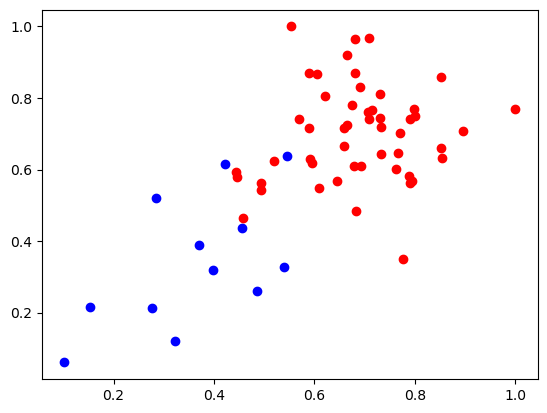

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel(r"data.xlsx", header=None)
X = np.array([df[0], df[1]])
y = np.array(df[2])

plt.scatter(X[0][np.where(y==1)], X[1][np.where(y==1)], color='blue')
plt.scatter(X[0][np.where(y==0)], X[1][np.where(y==0)], color='red')

plt.show()

In [15]:
def prediction(x, W, b):
    return np.matmul(x,W)+b >= 0

def perceptronStep(X, y, W, b, lr):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * lr
            W[1] += X[i][1] * lr
            b += lr
        elif y[i] - y_hat == -1:
            W[0] -= X[i][0] * lr
            W[1] -= X[i][1] * lr
            b -= lr
            
    return W, b

def trainPerceptron(X, y, lr, n_epochs):
    W = np.array(np.random.rand(2,1))
    b = 2
    lines = []
    
    for i in range(n_epochs):
        lines.append((-W[0]/W[1], -b/W[1]))
        W, b = perceptronStep(X, y, W, b, lr)
    return lines

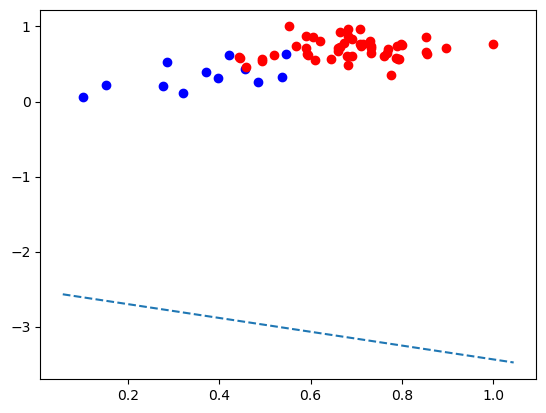

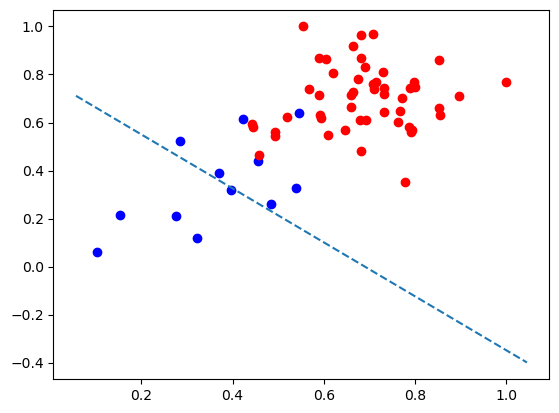

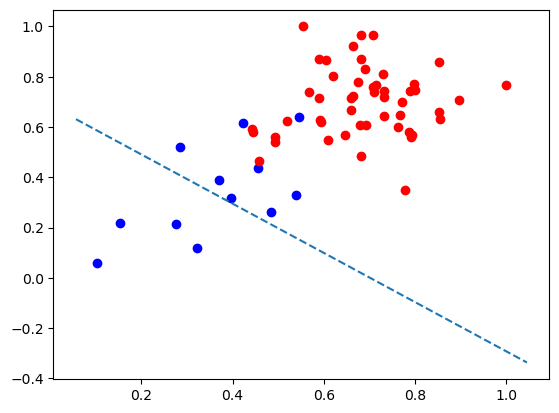

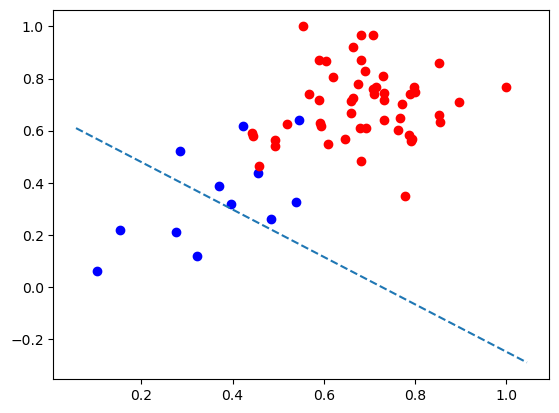

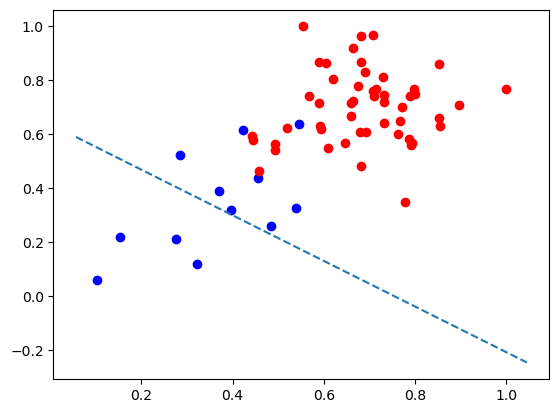

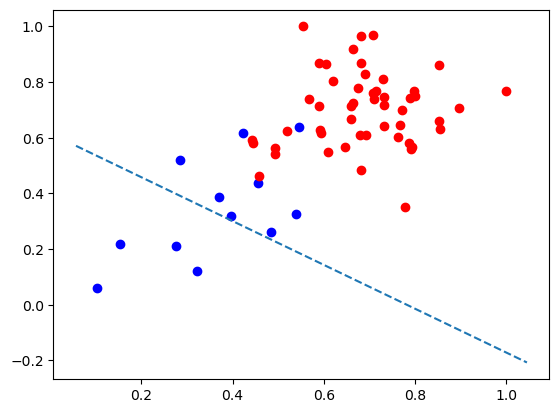

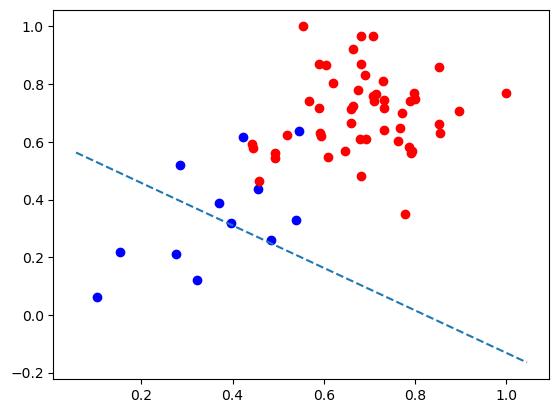

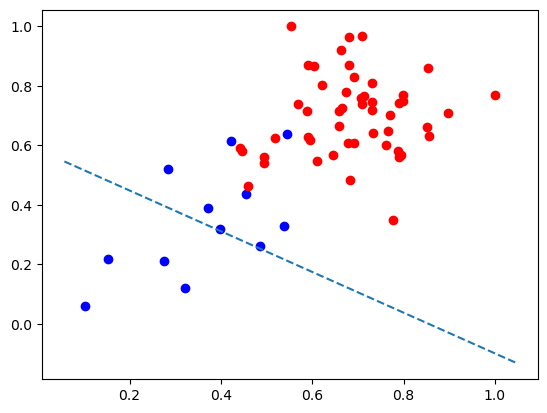

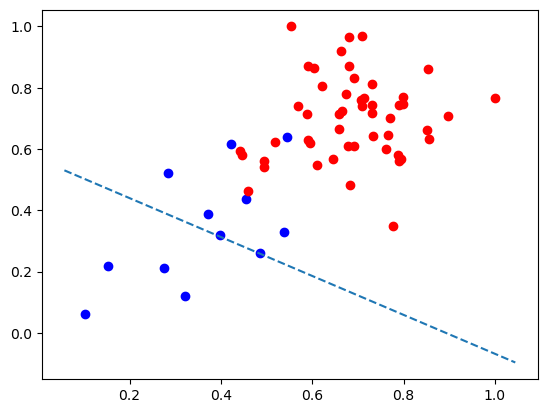

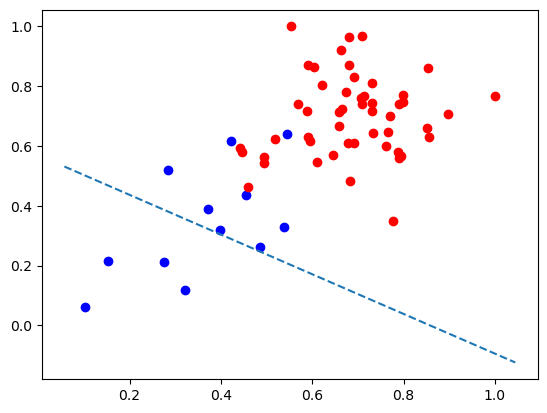

In [17]:
res = trainPerceptron(X.T, y, lr=0.1, n_epochs=10)



def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

    
for i in range(len(res)):
    plt.scatter(X[0][np.where(y==1)], X[1][np.where(y==1)], color='blue')
    plt.scatter(X[0][np.where(y==0)], X[1][np.where(y==0)], color='red')
    abline(res[i][0], res[i][1])
    plt.show()

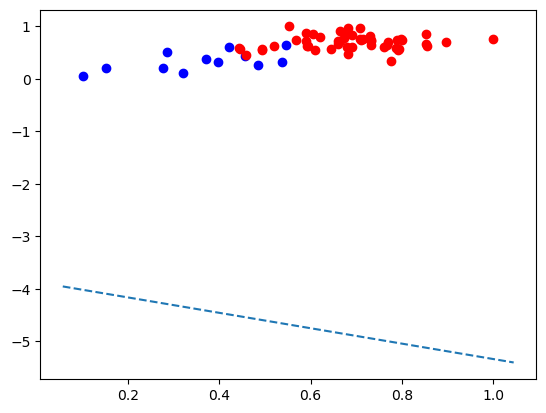

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = np.array(X)  # Convert X to a NumPy array
res = trainPerceptron(X.T, y, lr=0.1, n_epochs=1)

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

for i in range(len(res)):
    plt.scatter(X[0][np.where(y == 1)], X[1][np.where(y == 1)], color='blue')
    plt.scatter(X[0][np.where(y == 0)], X[1][np.where(y == 0)], color='red')
    abline(res[i][0], res[i][1])
    plt.show()


##### Softmax function

In [9]:
import numpy as np

def softmax(L):
    exps = np.exp(L)
    sumOfExps = sum(exps)

    result = []
    for i in range(len(exps)):
        result.append(exps[i]/sumOfExps)
    return result
    
softmax([2,1,0])

[0.6652409557748219, 0.24472847105479764, 0.09003057317038046]

In [10]:
def crossEntropy(y, output):
    return -y * np.log(output) - (1-y) * np.log(1-output)

crossEntropy(1, 0.1) #it means our original label was 1 and our prediction says that we are 0.1% sure that it should be 1 which means we are less sure. That means the cross entropy will be higher

2.3025850929940455

In [11]:
crossEntropy(1, 0.9)

0.10536051565782628

In [12]:
def sigmoid(x):
    return 1/1+np.exp(-x)

def outputFormula(X, w, bias):
    return sigmoid(np.dot(X, w) + bias)